<a href="https://colab.research.google.com/github/lurahayes/assignment3/blob/main/Assignment_3_Lura_Hayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

1. importing data and initial examination

In [200]:
! git clone https://www.github.com/DS3001/assignment3



fatal: destination path 'assignment3' already exists and is not an empty directory.


In [201]:
import pandas as pd

In [202]:
cardf = pd.read_csv("./assignment3/data/car_data.csv")

In [203]:
cardf.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [204]:
cardf.shape

(1000, 5)

2. looking for missing values and turned age into dummy variable

In [205]:
cardf['User ID'].unique()

array([ 385,  681,  353,  895,  661,  846,  219,  588,   85,  465,  686,
        408,  790,  116,  118,   54,   90,  372,  926,   94,  338,  134,
        821,  294,  597,  567,   20,  108,  105,  994,  273,  263,  423,
         88,   81,  257,  755,  249,  121,  489,  555,  222,  590,  645,
        689,  646,  964,  384,  826,   27,  268,  466,  411,  445,  428,
        974,  828,  348,  730,  820,  917,   15,  365,  674,   30,  531,
        190,  160,  371,  321,  230,  819,  965,  351,  266,  629,  891,
        311,  439,  861,  510,  277,  417,  123,  912,  667,  435,  722,
        892,  279,  500,  684,  414,  349,  456,  485,  960,  233,  191,
        471,  977,  120,  126,   23,  225,  772,  398,  367,  511,  775,
        324,  829,  478,  546,  942,  571,  375,  905,  132,  438,  972,
        596,  395,  663,  903,   25,  599,  563,  607,  928,  453,  509,
        203,  450,  573,  662,  651,   19,  634,  647,  693,  728,  520,
        213,  142,  322,  540,  743,  887,  241,  7

In [206]:
len(cardf)

1000

In [207]:
len(cardf['User ID'])

1000

no missing userID

In [208]:
cardf['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [209]:
len(cardf['Gender'])

1000

In [210]:
var = 'Gender'

In [211]:
cardf['sex'] = 0
cardf.loc[cardf['Gender']== 'Female', 'sex'] = 1
cardf['sex'].value_counts()

1    516
0    484
Name: sex, dtype: int64

no missing gender values, converted to 0 for male and 1 for female

In [212]:
cardf['Age'].unique()

array([35, 40, 49, 25, 47, 46, 42, 30, 41, 32, 27, 33, 39, 54, 31, 24, 48,
       38, 45, 37, 44, 26, 21, 59, 43, 28, 51, 55, 23, 50, 20, 58, 34, 57,
       53, 36, 60, 29, 61, 18, 62, 22, 63, 52, 56, 19])

In [213]:
len(cardf['Age'])

1000

None missing for age

In [214]:
cardf["AnnualSalary"].unique()

array([ 20000,  43500,  74000, 107500,  79000,  33500, 132500,  64000,
        84500,  52000,  80000,  23000,  72500,  57000, 108000, 149000,
        75000,  53000, 134000,  51500,  39000,  25500,  61500, 117500,
        58000, 107000,  97500,  29000, 147500,  26000,  67500,  62000,
        79500, 113500,  41500,  55000, 114500,  73000,  15000,  37500,
        39500,  66500,  80500,  86000,  76500, 123000,  48500,  60500,
        99500,  35500, 130000,  56500,  36000,  21500,  98500,  59500,
       147000, 109500,  26500,  88000,  22000,  71000, 129000,  45000,
        42000,  40500,  86500,  63000, 115500,  55500,  32500, 106500,
        53500,  28000, 151500,  88500,  17000,  76000, 136500, 120500,
        44500,  18500,  50000, 144500,  51000,  38500, 103500,  75500,
        87000,  84000,  16000,  29500,  44000,  30000,  83000, 108500,
       112000, 143000,  61000,  59000,  99000,  41000,  23500,  34500,
        72000, 137000, 144000,  24500,  89000,  77500,  31500,  81500,
      

In [215]:
import numpy as np


In [216]:
len(cardf) - np.sum(cardf['AnnualSalary'].value_counts().values)

0

In [217]:
cardf["Purchased"].unique()

array([0, 1])

In [218]:
len(cardf) - np.sum(cardf['Purchased'].value_counts().values)

0

2.a Creating a matrix

In [219]:
X = cardf.loc[:,['Age','AnnualSalary']]
y = cardf['Purchased']
X.head

<bound method NDFrame.head of      Age  AnnualSalary
0     35         20000
1     40         43500
2     49         74000
3     40        107500
4     25         79000
..   ...           ...
995   38         59000
996   47         23500
997   28        138500
998   48        134000
999   44         73500

[1000 rows x 2 columns]>

In [220]:
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,40.106000,72689.000000
std,10.707073,34488.341867
min,18.000000,15000.000000
25%,32.000000,46375.000000
50%,40.000000,72000.000000
75%,48.000000,90000.000000
max,63.000000,152500.000000


3. max min normalizing age and annual salary

In [221]:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [222]:
X = X.apply(maxmin)
X.head

<bound method NDFrame.head of           Age  AnnualSalary
0    0.377778      0.036364
1    0.488889      0.207273
2    0.688889      0.429091
3    0.488889      0.672727
4    0.155556      0.465455
..        ...           ...
995  0.444444      0.320000
996  0.644444      0.061818
997  0.222222      0.898182
998  0.666667      0.865455
999  0.577778      0.425455

[1000 rows x 2 columns]>

In [223]:
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


4. Splitting the dataset

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [226]:
len(y_test)

200

In [227]:
len(y_train)

800

5. Finding optimal value for K

In [228]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [230]:
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE_test[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE_test)
min_index = np.where(SSE_test==SSE_min)
optimal_k = k_grid[min_index]
optimal_k

array([9])

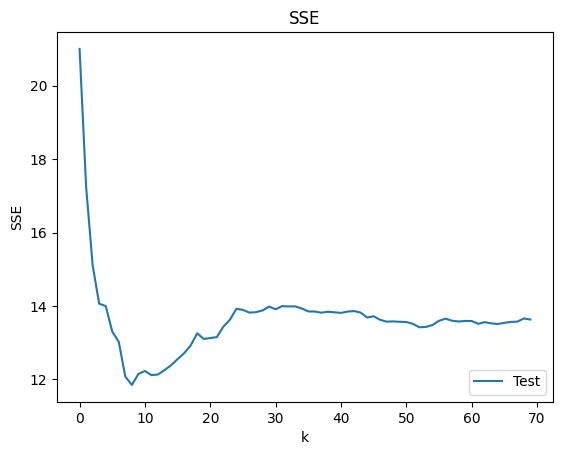

In [231]:
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

The optimal k is about 9! This is shown both by index of the min SSE and the graph.

6. Now, let's see how well this prediciton model works using the confusion matrix.

In [232]:
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)

pd.crosstab(y_test, y_hat)

col_0,0,1
Purchased,,
0,104,15
1,3,78


It's mostly working. However, it's harder for it to predict an accurate purchase than an accurate non-purchase. This model is correct in guessing the outcome .91% of the time.

7. Seeing if the predictions are more accurate for men and women.

In [233]:
vars = ['Age','AnnualSalary','Gender']
X = cardf.loc[:,vars]
y = cardf['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

In [234]:
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

In [235]:
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_F = y_test[ X_test['Gender'] == 'Female']

In [236]:
pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,56,6
1,12,35


83.5% accurate for women

In [237]:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_M = y_test[ X_test['Gender'] == 'Male']

In [238]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,58,5
1,10,18


83.5% accurate for men.

The model predicts men and women with about the same accuracy.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [239]:
usacars = pd.read_csv("./assignment3/data/USA_cars_datasets.csv")

price =0
year
milegae

In [240]:
usacars.head

<bound method NDFrame.head of       Unnamed: 0  price      brand    model  year   title_status  mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle   274117   
1              1   2899       ford       se  2011  clean vehicle   190552   
2              2   5350      dodge      mpv  2018  clean vehicle    39590   
3              3  25000       ford     door  2014  clean vehicle    64146   
4              4  27700  chevrolet     1500  2018  clean vehicle     6654   
...          ...    ...        ...      ...   ...            ...      ...   
2494        2494   7800     nissan    versa  2019  clean vehicle    23609   
2495        2495   9200     nissan    versa  2018  clean vehicle    34553   
2496        2496   9200     nissan    versa  2018  clean vehicle    31594   
2497        2497   9200     nissan    versa  2018  clean vehicle    32557   
2498        2498   9200     nissan    versa  2018  clean vehicle    31371   

       color                  vin        lot 

In [241]:
cols = ['price', 'year', 'mileage']

In [242]:
usacars = usacars[cols]

In [243]:
usacars.head

<bound method NDFrame.head of       price  year  mileage
0      6300  2008   274117
1      2899  2011   190552
2      5350  2018    39590
3     25000  2014    64146
4     27700  2018     6654
...     ...   ...      ...
2494   7800  2019    23609
2495   9200  2018    34553
2496   9200  2018    31594
2497   9200  2018    32557
2498   9200  2018    31371

[2499 rows x 3 columns]>

In [244]:
usacars['price'].unique()

array([ 6300,  2899,  5350, 25000, 27700,  5700,  7300, 13350, 14600,
        5250, 10400, 12920, 31900,  5430, 20700, 12710,  5200, 16500,
        5210, 38100, 12520, 15000,  6180, 20800, 11900, 21500, 12000,
        4190, 13000, 18500, 29800,  5330, 16600, 19200,  7320,  7000,
       30500,  6330, 55000, 16200, 19000,  5580, 54000, 16000, 27000,
        7760, 19600, 20000, 18100, 23000, 13490, 17800,  6650, 29100,
       21100, 18600,  4340, 19300, 12780, 15800, 29400,  4430, 19400,
       15900, 26400,  4140, 18300, 17900,  4640, 24000, 13200, 18000,
       14900, 11500,  9110,  7350, 24500,  9300, 39800, 53500, 15110,
       34000, 26502,  5990, 13600, 23605, 10780, 13800, 25201,  7070,
        8700, 18003,  8530, 23100, 17000, 34002,  6980, 20802,  9200,
       26500, 24802, 28500, 47500, 23500, 23505, 10940, 32100, 53000,
        6830, 26414,  4160, 19405,  5690, 25900, 24005,  5090, 19500,
       32012,  6800,  4260,     0, 31802,  7210, 28402, 33300,  6700,
        6440, 19900,

In [245]:
usacars['price'].value_counts()

0        43
16500    26
13900    21
15500    19
15000    19
         ..
12560     1
11760     1
7340      1
6530      1
30100     1
Name: price, Length: 790, dtype: int64

In [246]:
usacars['year'].unique()

array([2008, 2011, 2018, 2014, 2010, 2017, 2009, 2013, 2015, 2020, 2016,
       1973, 2003, 2019, 2002, 2000, 2001, 2005, 2012, 2006, 2007, 1998,
       2004, 1994, 1997, 1996, 1999, 1984, 1995, 1993])

In [247]:
usacars['year'].value_counts()

2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: year, dtype: int64

In [248]:
len(usacars) - usacars['year'].value_counts()

2019    1607
2018    2104
2017    2122
2016    2296
2015    2303
2014    2395
2013    2413
2012    2427
2020    2451
2011    2476
2008    2481
2010    2486
2009    2488
2003    2490
2006    2491
2004    2493
2007    2493
2005    2493
2001    2494
1998    2495
2000    2495
2002    2497
1994    2497
1997    2497
1996    2497
1973    2498
1999    2498
1984    2498
1995    2498
1993    2498
Name: year, dtype: int64

In [249]:
len(usacars) - np.sum(usacars['year'].value_counts())

0

None missing for year

In [250]:
usacars['mileage'].unique()

array([274117, 190552,  39590, ...,  34553,  32557,  31371])

In [251]:
usacars['mileage'].value_counts()

1        11
0         6
31727     2
33808     2
21774     2
         ..
90685     1
54141     1
82240     1
66167     1
31371     1
Name: mileage, Length: 2439, dtype: int64

In [252]:
len(usacars) - np.sum(usacars['mileage'].value_counts())

0

2. max min normalizing and creating matrices

In [253]:
X = usacars.loc[:,['year','mileage']]
y = usacars['price']

In [254]:
X = X.apply(maxmin)
X.head

<bound method NDFrame.head of           year   mileage
0     0.744681  0.269287
1     0.808511  0.187194
2     0.957447  0.038892
3     0.872340  0.063016
4     0.957447  0.006537
...        ...       ...
2494  0.978723  0.023193
2495  0.957447  0.033944
2496  0.957447  0.031037
2497  0.957447  0.031983
2498  0.957447  0.030818

[2499 rows x 2 columns]>

3. Splitting into test vs train data

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [256]:
X_train.head()

,year,mileage
2460,0.957447,0.036792
1707,0.936170,0.098162
54,0.978723,0.041897
1735,0.978723,0.048386
2188,0.978723,0.028750


In [257]:
len(X_train)

1999

In [258]:
len(X_test)

500

none missing for mileage

4. Use the  𝑘 NN algorithm for regression and the training data to predict price using year and mileage for the test set for  𝑘=3,10,25,50,100,300 . For each value of  𝑘 , compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase  𝑘 ?

In [259]:
from sklearn.neighbors import KNeighborsRegressor


In [260]:
model = KNeighborsRegressor(n_neighbors=3)
fitted_model = model.fit(X_train, y_train)
y_hat = model.predict(X_test)
sse = np.sum((y_test - y_hat) ** 2)
print(sse)

63223286609.11111


Text(0.5, 1.0, 'Actual Values vs. Predicted Values')

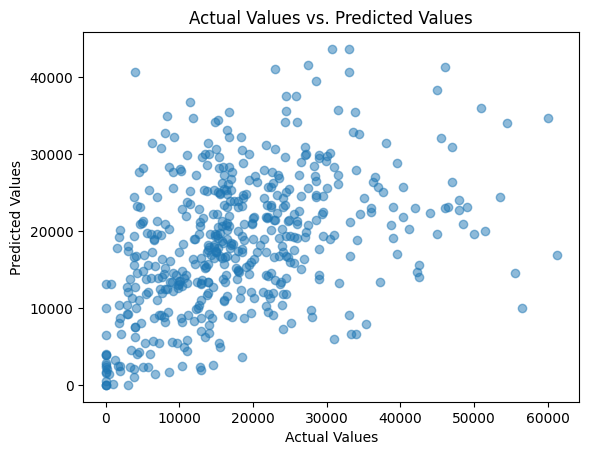

In [261]:
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs. Predicted Values")

In [262]:
model = KNeighborsRegressor(n_neighbors=10)
fitted_model = model.fit(X_train, y_train)
y_hat = model.predict(X_test)
sse = np.sum((y_test - y_hat) ** 2)
print(sse)

55401092793.409996


Text(0.5, 1.0, 'Actual Values vs. Predicted Values')

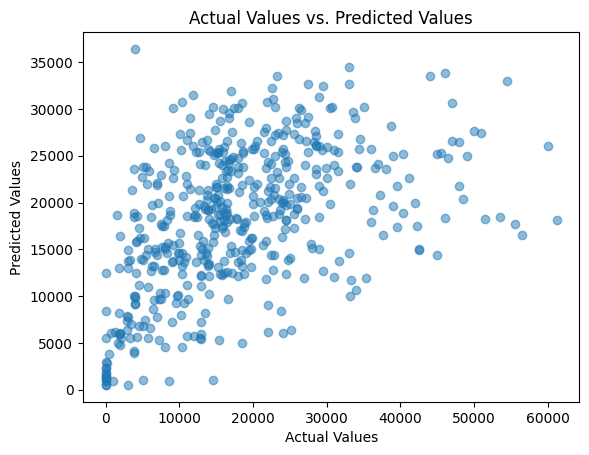

In [263]:
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs. Predicted Values")

In [264]:
model = KNeighborsRegressor(n_neighbors=25)
fitted_model = model.fit(X_train, y_train)
y_hat = model.predict(X_test)
sse = np.sum((y_test - y_hat) ** 2)
print(sse)

51585228924.304


Text(0.5, 1.0, 'Actual Values vs. Predicted Values')

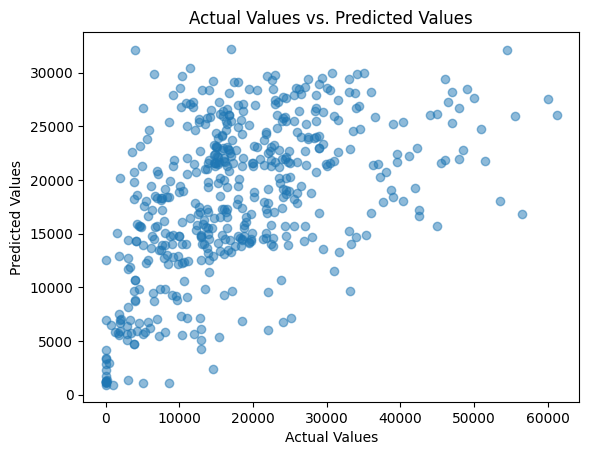

In [265]:
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs. Predicted Values")

In [266]:
model = KNeighborsRegressor(n_neighbors=50)
fitted_model = model.fit(X_train, y_train)
y_hat = model.predict(X_test)
sse = np.sum((y_test - y_hat) ** 2)
print(sse)

49847721982.09799


Text(0.5, 1.0, 'Actual Values vs. Predicted Values')

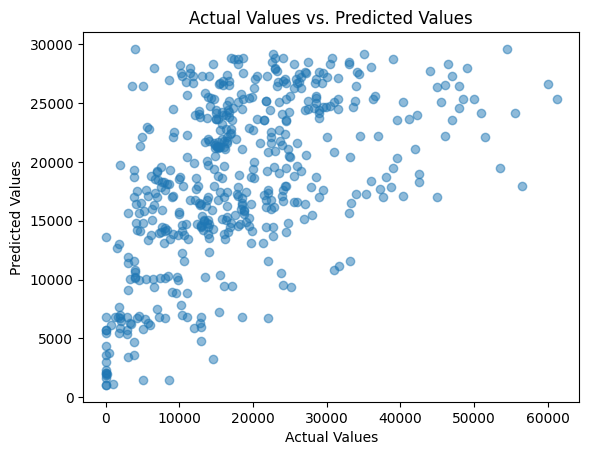

In [267]:
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs. Predicted Values")

In [268]:
model = KNeighborsRegressor(n_neighbors=100)
fitted_model = model.fit(X_train, y_train)
y_hat = model.predict(X_test)
sse = np.sum((y_test - y_hat) ** 2)
print(sse)

49135529480.4603


Text(0.5, 1.0, 'Actual Values vs. Predicted Values')

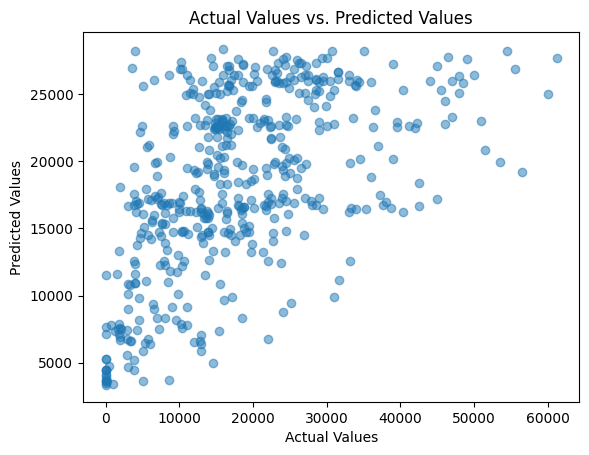

In [269]:
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs. Predicted Values")

In [270]:
model = KNeighborsRegressor(n_neighbors=300)
fitted_model = model.fit(X_train, y_train)
y_hat = model.predict(X_test)
sse = np.sum((y_test - y_hat) ** 2)
print(sse)

50238649457.106


Text(0.5, 1.0, 'Actual Values vs. Predicted Values')

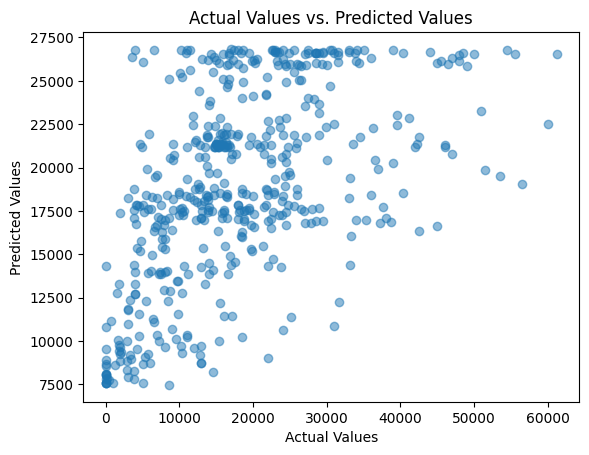

In [271]:
plt.scatter(y_test, y_hat, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs. Predicted Values")

From k=3 to k=25, as I increase the value of k clusters of correctly predicted prices begin to emerge. However, as k increases past that we begin to lose data points and the model becomes overfit. As k increases to a certain point, the model becomes more reliable. As we reach about 25, the model becomes too complex to be reliable.

5. Finding the Optimal k

In [272]:
X = usacars.loc[:,['year','mileage']]
y = usacars['price']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [274]:
k_bar = 300
k_grid = np.arange(1,k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE_test[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE_test)
min_index = np.where(SSE_test==SSE_min)
optimal_k = k_grid[min_index]
optimal_k

array([12])

The optimal k for this model is 12

6. Describe what happened in the plots of predicted versus actual prices as  𝑘  varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

What I predicted in 4 was kind of correct, but the optimal value of k is a lot lower. As we stray too far above 12, we begin to lose data points, and the model is too complex in order to be reliable for predictions. When we use a k lower than 12, the model is underfit, and we don't have clear predictions because it's too generalized.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1. creating datasets with different amounts of noise

In [275]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

def createData(noise,N=50):
  np.random.seed(100) # Set the seed for replicability
# Generate (x1,x2,g) triples:
  X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
  X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
  X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
# Concatenate into one data frame
  gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
  gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
  gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
  df = pd.concat([gdf1,gdf2,gdf3],axis=0)
  return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Creating grouped scatter plots for the different levels of noise

<Axes: xlabel='x1', ylabel='x2'>

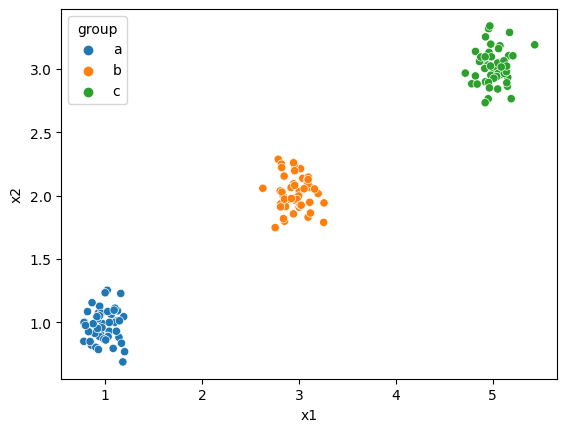

In [276]:
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2',hue = 'group')

<Axes: xlabel='x1', ylabel='x2'>

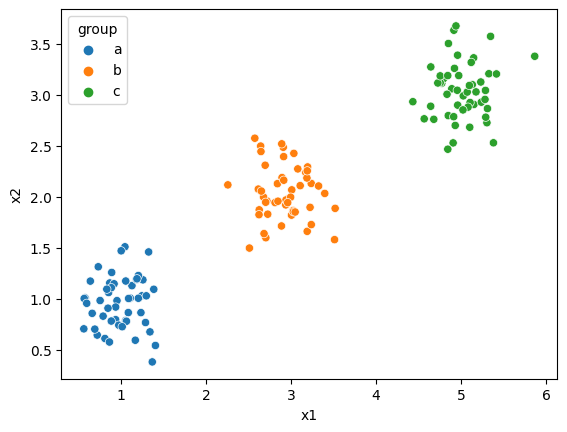

In [277]:
sns.scatterplot(data = df0_25, x = 'x1', y = 'x2' ,hue = 'group')

<Axes: xlabel='x1', ylabel='x2'>

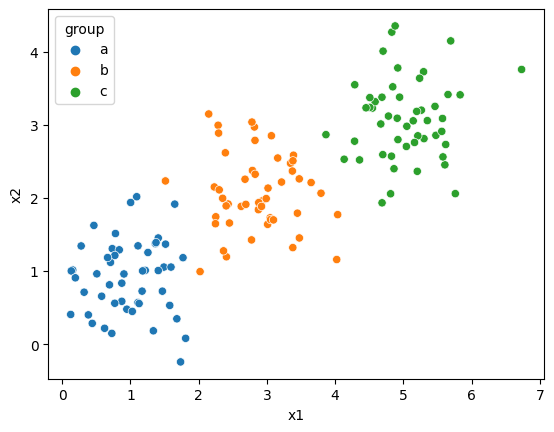

In [278]:
sns.scatterplot(data = df0_5, x = 'x1', y = 'x2', hue = 'group')

<Axes: xlabel='x1', ylabel='x2'>

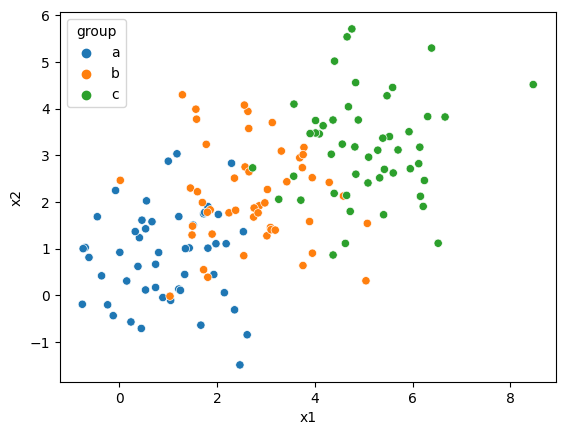

In [279]:
sns.scatterplot(data = df1_0, x = 'x1', y = 'x2', hue ='group')

<Axes: xlabel='x1', ylabel='x2'>

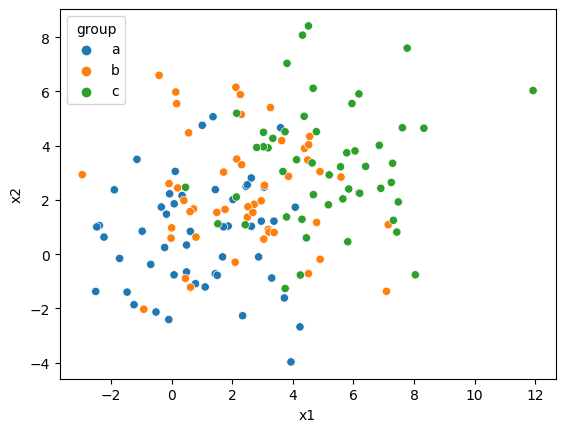

In [280]:
sns.scatterplot(data = df2_0, x = 'x1', y= 'x2', hue = 'group')

As the noise increases in each dataset, the clusters become more scattered. 0.125 and 0.25 have 3 very distinct clusters. When we get into whole numbers of noiseiness (1 and 2), the clusters become almost indistinguishable.

3. Scree plots for each dataset

In [281]:
X = df0_125.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

(0.0, 35.0)

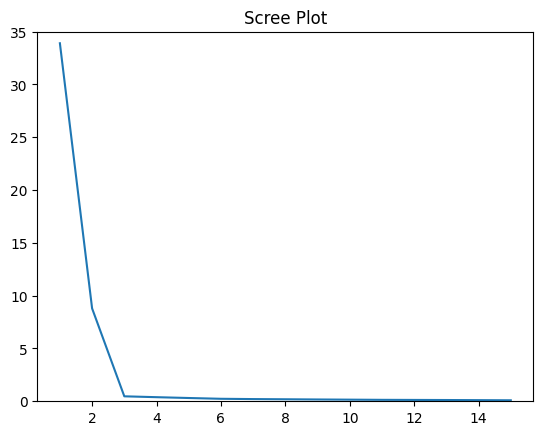

In [282]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  model = KMeans(n_clusters=k+1, n_init= 10)
  model = model.fit(X)
  SSE[k] = model.inertia_

scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0, 35)

elbow at 3

In [283]:
X = df0_25.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

(0.0, 35.0)

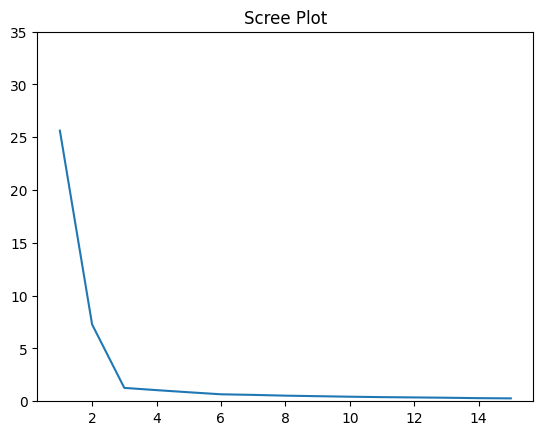

In [284]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  model = KMeans(n_clusters=k+1, n_init= 10)
  model = model.fit(X)
  SSE[k] = model.inertia_

scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0, 35)

elbow at 3

In [285]:
X = df0_5.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

(0.0, 35.0)

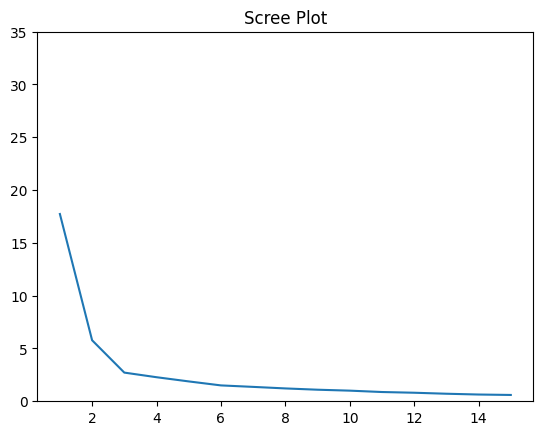

In [286]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  model = KMeans(n_clusters=k+1, n_init= 10)
  model = model.fit(X)
  SSE[k] = model.inertia_

scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0, 35)

elbow at 3 (small variation at 2)

In [287]:
X = df1_0.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

(0.0, 35.0)

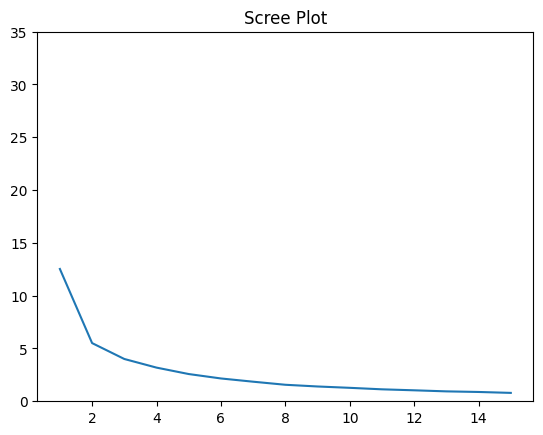

In [288]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  model = KMeans(n_clusters=k+1, n_init= 10)
  model = model.fit(X)
  SSE[k] = model.inertia_

scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0, 35)

elbow at 2

In [289]:
X = df2_0.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

(0.0, 35.0)

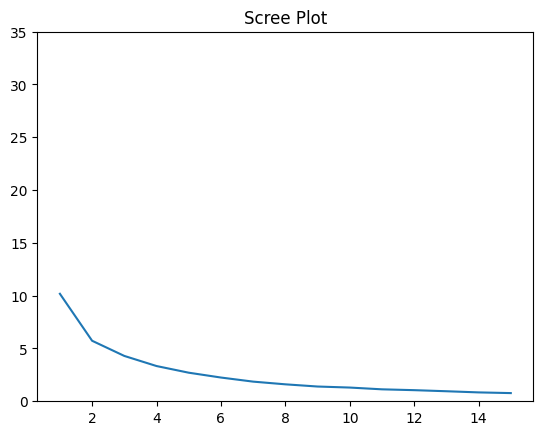

In [290]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  model = KMeans(n_clusters=k+1, n_init= 10)
  model = model.fit(X)
  SSE[k] = model.inertia_

scree_plot, axes = plt.subplots()
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
axes.set_ylim(0, 35)

not really a distinguished elbow

4. Explaining the elbow

The elbow helps to determine how many distinguished clusters or groups we have in a dataset. While we knew that it should be 3 in this particular example, it is helpful in other datasets to determine how to move forward with KMC. As the noise increases, we begin to lose previously distinguished clusters. This can be seen when the elbow looks like its at 2. When there's too much noise, we lose the clusters altogether.